In [2]:
from datetime import datetime
import time
import pandas as pd
import numpy as np
import pandas_datareader.data as web

In [3]:
df = pd.read_excel('./Data/Yahoo_Ticker_Symbols_September_2017.xlsx',sheet_name='Stock',usecols=[0,1,2,3,4],skiprows=[0,1,2])
df = df[df['Country']=='USA']
df

,Ticker,Name,Exchange,Category Name,Country
0,AAPL,Apple Inc.,NMS,Electronic Equipment,USA
1,BAC,Bank of America Corporation,NYQ,Money Center Banks,USA
2,AMZN,"Amazon.com, Inc.",NMS,Catalog & Mail Order Houses,USA
3,T,AT&T Inc.,NYQ,Telecom Services - Domestic,USA
4,GOOG,Alphabet Inc.,NMS,Internet Information Providers,USA
...,...,...,...,...,...
106249,USWL,"US-Worldlink.Com, Inc.",PNK,NaN,USA
106277,GROG,"GroGenesis, Inc.",PNK,Agricultural Chemicals,USA
106283,INCT,"InCapta, Inc.",PNK,NaN,USA
106290,INDVF,IndigoVision Group plc,PNK,NaN,USA


In [152]:
Stock_Tickers = df.Ticker.tolist()
Stock_Tickers = Stock_Tickers[7000:10000]

## Rolling Mean

In [3]:
Result = web.DataReader('AAPL', "av-daily-adjusted", start=datetime(2000, 1, 1),end=datetime(2020, 7, 28),api_key='HB6AQYORTFYP87MI')
Result['Ticker'] = 'AAPL'
Result

,open,high,low,close,adjusted close,volume,dividend amount,split coefficient,Ticker
2000-01-03,104.8700,112.5000,101.690,111.94,0.858047,4783900,0.0,1.0,AAPL
2000-01-04,108.2500,110.6200,101.190,102.50,0.785688,4574800,0.0,1.0,AAPL
2000-01-05,103.7500,110.5600,103.000,104.00,0.797185,6949300,0.0,1.0,AAPL
2000-01-06,106.1200,107.0000,95.000,95.00,0.728198,6856900,0.0,1.0,AAPL
2000-01-07,96.5000,101.0000,95.500,99.50,0.762692,4113700,0.0,1.0,AAPL
...,...,...,...,...,...,...,...,...,...
2020-07-22,386.7700,391.9000,386.410,389.09,96.472410,22250413,0.0,1.0,AAPL
2020-07-23,387.9935,388.3100,368.039,371.38,92.081327,49251108,0.0,1.0,AAPL
2020-07-24,363.9500,371.8800,356.580,370.46,91.853219,46359716,0.0,1.0,AAPL
2020-07-27,374.8400,379.6200,373.920,379.24,94.030165,30303548,0.0,1.0,AAPL


In [6]:
close_px = Result['adjusted close']
mavg = close_px.rolling(window=100).mean()

/Users/yueqiang/Desktop/FIU_Project/US_Stock/venv/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


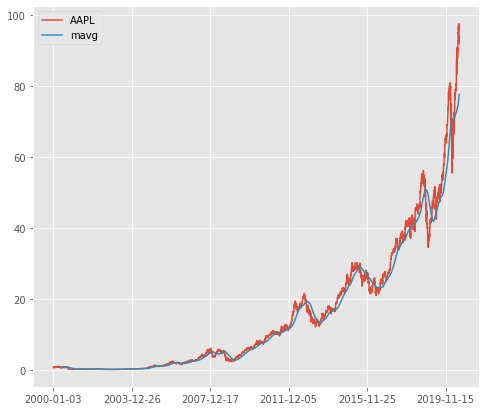

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

## Correlation Analysis

In [42]:
# Stock_Tickers = ['AAPL']
# for Ticker in Stock_Tickers:
#     data = web.DataReader(Ticker, "av-daily-adjusted", start=datetime(2020, 7, 1),end=datetime(2020, 7, 15),api_key='HB6AQYORTFYP87MI')['adjusted close']
#     data['Ticker'] = Ticker
#     data
data = pd.read_csv("Result/history_file_return.csv")
data['date'] = pd.to_datetime(data['date'])
data = data[(data['ticker'].isin(['AAPL','GE','GOOG','IBM','MSFT'])) & (data['date'] >= '2015-07-01') & (data['date'] <= '2020-07-01')]
data

,date,close,volume,ticker,Return
17660,2015-07-01,126.60,30238811,AAPL,0.009325
17661,2015-07-02,126.44,27210952,AAPL,-0.001265
17662,2015-07-06,126.00,28060431,AAPL,-0.003486
17663,2015-07-07,125.69,46946811,AAPL,-0.002463
17664,2015-07-08,122.57,60761614,AAPL,-0.025136
...,...,...,...,...,...
1464900,2020-06-25,200.34,27803933,MSFT,0.012557
1464901,2020-06-26,196.33,54675780,MSFT,-0.020219
1464902,2020-06-29,198.44,26701586,MSFT,0.010690
1464903,2020-06-30,203.51,34310283,MSFT,0.025228


In [46]:
table = data.pivot_table(values="Return",index="date",columns="ticker")
table

ticker,AAPL,GE,GOOG,IBM,MSFT
date,,,,,
2015-07-01,0.009325,0.003382,0.002552,0.011188,0.006660
2015-07-02,-0.001265,0.004491,0.002985,0.003641,-0.001013
2015-07-06,-0.003486,-0.017706,-0.001032,-0.002183,-0.000225
2015-07-07,-0.002463,0.006063,0.004123,0.001638,-0.002030
2015-07-08,-0.025136,-0.022155,-0.015722,-0.011214,-0.001355
...,...,...,...,...,...
2020-06-25,0.013188,0.022711,0.006515,0.022171,0.012557
2020-06-26,-0.031208,-0.030397,-0.058155,-0.015579,-0.020219
2020-06-29,0.022785,0.048202,0.025462,0.021610,0.010690


In [48]:
corr_table = table.corr()
corr_table

ticker,AAPL,GE,GOOG,IBM,MSFT
ticker,,,,,
AAPL,1.000000,0.419796,0.650767,0.528612,0.714587
GE,0.419796,1.000000,0.382212,0.517104,0.416868
GOOG,0.650767,0.382212,1.000000,0.528367,0.756107
IBM,0.528612,0.517104,0.528367,1.000000,0.595721
MSFT,0.714587,0.416868,0.756107,0.595721,1.000000


Text(0, 0.5, 'Returns GE')

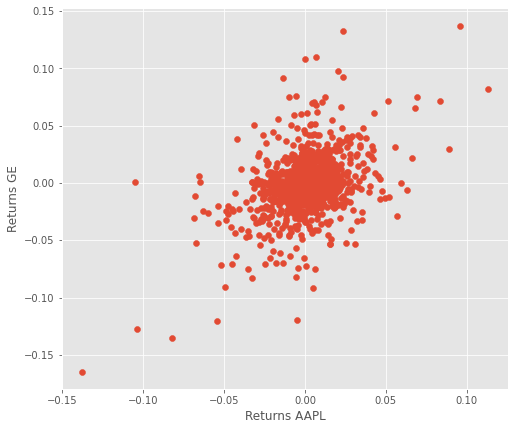

In [49]:
plt.scatter(table.AAPL, table.GE)
plt.xlabel('Returns AAPL')
plt.ylabel('Returns GE')

array([[<AxesSubplot:xlabel='AAPL', ylabel='AAPL'>,
        <AxesSubplot:xlabel='GE', ylabel='AAPL'>,
        <AxesSubplot:xlabel='GOOG', ylabel='AAPL'>,
        <AxesSubplot:xlabel='IBM', ylabel='AAPL'>,
        <AxesSubplot:xlabel='MSFT', ylabel='AAPL'>],
       [<AxesSubplot:xlabel='AAPL', ylabel='GE'>,
        <AxesSubplot:xlabel='GE', ylabel='GE'>,
        <AxesSubplot:xlabel='GOOG', ylabel='GE'>,
        <AxesSubplot:xlabel='IBM', ylabel='GE'>,
        <AxesSubplot:xlabel='MSFT', ylabel='GE'>],
       [<AxesSubplot:xlabel='AAPL', ylabel='GOOG'>,
        <AxesSubplot:xlabel='GE', ylabel='GOOG'>,
        <AxesSubplot:xlabel='GOOG', ylabel='GOOG'>,
        <AxesSubplot:xlabel='IBM', ylabel='GOOG'>,
        <AxesSubplot:xlabel='MSFT', ylabel='GOOG'>],
       [<AxesSubplot:xlabel='AAPL', ylabel='IBM'>,
        <AxesSubplot:xlabel='GE', ylabel='IBM'>,
        <AxesSubplot:xlabel='GOOG', ylabel='IBM'>,
        <AxesSubplot:xlabel='IBM', ylabel='IBM'>,
        <AxesSubplot:xlabel='MSFT',

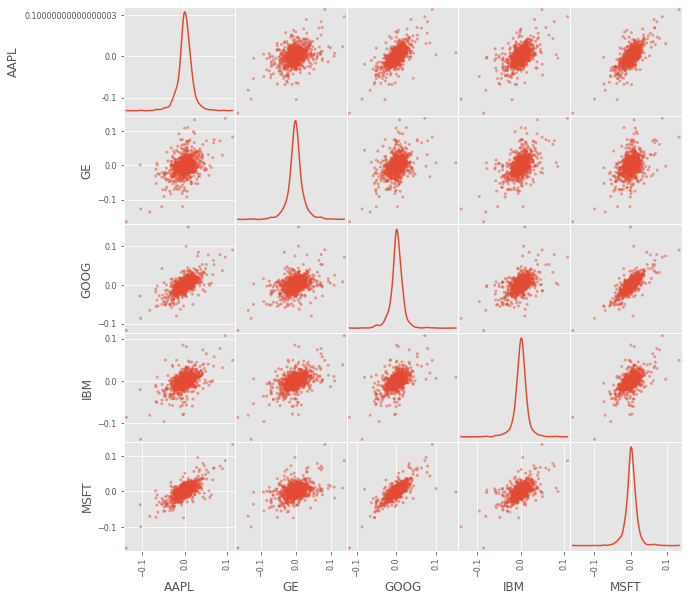

In [55]:
pd.plotting.scatter_matrix(table, diagonal='kde', figsize=(10, 10))

([<matplotlib.axis.YTick at 0x11b0958d0>,
 [Text(0, 0, 'AAPL'),
  Text(0, 1, 'GE'),
  Text(0, 2, 'GOOG'),
  Text(0, 3, 'IBM'),
  Text(0, 4, 'MSFT')])

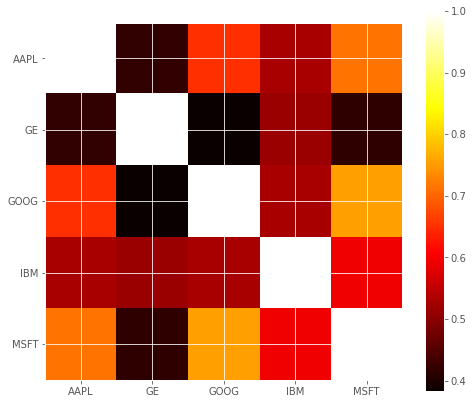

In [57]:
plt.imshow(corr_table, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr_table)), corr_table.columns)
plt.yticks(range(len(corr_table)), corr_table.columns)

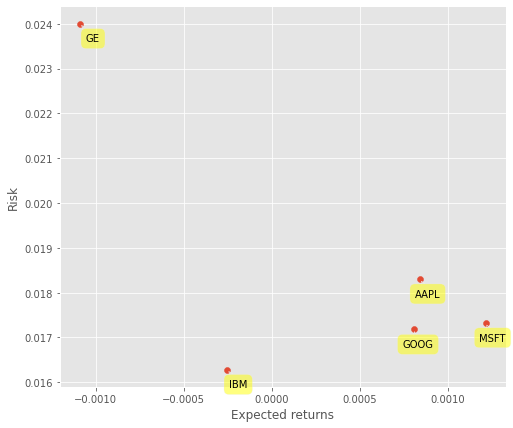

In [59]:
plt.scatter(table.mean(), table.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(table.columns, table.mean(), table.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

In [154]:
Exception_list=[]
for Ticker in Stock_Tickers:
    try:
        data = web.DataReader(Ticker, "av-daily", start=datetime(2020, 7, 21),end=datetime(2020, 7, 21),api_key='OBN8PXVTLNCZ2ULQ')
        data['Ticker'] = Ticker
        Result = Result.append(data)
        print(Ticker)
        time.sleep(10)
    except:
        print("An exception occurred: " + Ticker)
        Exception_list.append(Ticker)
        time.sleep(10)
Result.to_csv('c.csv',mode='a')
pd.DataFrame(Exception_list).to_csv('except_list.csv',mode='a')

ion occurred: MKTY
An exception occurred: MDFI
An exception occurred: MCPIQ
An exception occurred: IMSU
An exception occurred: CRHM
An exception occurred: CDOM
An exception occurred: CBO
An exception occurred: WNDM
An exception occurred: VCV
An exception occurred: TTTM
An exception occurred: TCPTF
An exception occurred: SCVM
An exception occurred: RVM
An exception occurred: PUMD
An exception occurred: PTMEY
An exception occurred: MUEL
An exception occurred: MOXC
An exception occurred: MONK
An exception occurred: MCEM
An exception occurred: INFO
An exception occurred: CALVF
An exception occurred: WRMT
An exception occurred: MSPC
An exception occurred: SRMC
An exception occurred: SRCH
An exception occurred: OSTO
An exception occurred: NYMTP
An exception occurred: MZEI
An exception occurred: MYMX
An exception occurred: MSBHY
An exception occurred: MRVC
An exception occurred: MOBQ
An exception occurred: MKC-V
An exception occurred: MGTC
An exception occurred: MDVXW
MCX
An exception occurre

In [109]:

# data = pd.read_csv('a.csv').rename(columns={"Unnamed: 0": "Date"})
# data = pd.read_csv('a.csv')
# data 
# data = data.drop_duplicates()
# data = data[ ~ data['Ticker'].str.contains('Ticker')]
# data = data.drop(axis=1,columns=['Unnamed: 0'])
# data.to_csv('b.csv',mode='a')
